**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

*Edición 2022*

<font color='MediumBlue'><strong><br>
Análisis Exploratorio y Curación de Datos<br>
GRUPO 16 -Integrantes:<br></strong>
- Fernanda Borghello,<br>
- Rodrigo Ruiz,<br>
- Alfonsina Szpeiner
</font>


----

# Trabajo práctico entregable - parte 1

En esta notebook, vamos a cargar el conjunto de datos de [la compentencia Kaggle](https://www.kaggle.com/dansbecker/melbourne-housing-snapshot) sobre estimación de precios de ventas de propiedades en Melbourne, Australia.

Utilizaremos el conjunto de datos reducido producido por [DanB](https://www.kaggle.com/dansbecker). Hemos subido una copia a un servidor de la Universidad Nacional de Córdoba para facilitar su acceso remoto.

<font color='Green'><strong>
1) PASO 1: Importamos las librerias necesarias para la lectura y análisis de los datos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context('talk')

!pip install python-decouple
!pip install SQLAlchemy
from decouple import config
from sqlalchemy import create_engine, text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly
plotly.__version__
# Make sure it's 4.14.3

'5.5.0'

<font color='Green'><strong>
PASO 2: Cargamos el conjunto de datos de la competencia Kaggle sobre estimación de precios de ventas de propiedades en Melbourne, Australia y solo las columnas que consideramos de interes del dataset de AIRBNB. Visualizamos las primeras tres filas y el total de registros (Ejercicio 1.2)

In [ ]:
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')
melb_df[:3]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
interesting_cols = [
  'description', 'neighborhood_overview',
  'street', 'neighborhood', 'city', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price', 'suburb',
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)
airbnb_df[:3]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,description,neighborhood_overview,street,neighborhood,city,suburb,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Very safe! Family oriented. Older age group.,"Bulleen, VIC, Australia",Balwyn North,Manningham,Bulleen,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,This hip area is a crossroads between two grea...,"Brunswick East, VIC, Australia",Brunswick,Moreland,Brunswick East,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,A stay at our apartment means you can enjoy so...,"St Kilda, VIC, Australia",St Kilda,Port Phillip,St Kilda,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


In [ ]:
len(airbnb_df)

22895

## Ejercicio 1 SQL: 

1. Crear una base de datos en SQLite utilizando la libreria [SQLalchemy](https://stackoverflow.com/questions/2268050/execute-sql-from-file-in-sqlalchemy).
https://docs.sqlalchemy.org/en/14/core/engines.html#sqlite

2. Ingestar los datos provistos en 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv' en una tabla y el dataset generado en clase con datos de airbnb y sus precios por codigo postal en otra.

3. Implementar consultas en SQL que respondan con la siguiente información:

    - cantidad de registros totales por ciudad.
    - cantidad de registros totales por barrio y ciudad.

4. Combinar los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL  para obtener un resultado similar a lo realizado con Pandas en clase.  



<font color='Green'><strong>
PASO 3: Creamos la base de datos en SQLITE (Ejercicio 1.1)

In [ ]:
engine = create_engine('sqlite:///sysarmy.sqlite3', echo=True)
conn = engine.connect()

<font color='Green'><strong>
PASO 4: Ingestamos los datos de 'Melbourne' y los de 'Aribnb' en tablas separadas. Visualizamos el tipo de cada variable.(Ejercicio 1.2)

In [ ]:
melb_df.to_sql('survey', con=engine, if_exists="replace")

2022-06-05 23:08:06,291 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("survey")
2022-06-05 23:08:06,296 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:06,304 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("survey")
2022-06-05 23:08:06,311 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:06,318 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-05 23:08:06,322 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:06,333 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("survey")
2022-06-05 23:08:06,336 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:06,346 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-06-05 23:08:06,348 INFO sqlalchemy.engine.Engine [raw sql] ('survey',)
2022-06-05 23:08:06,353 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("survey")
2022

In [ ]:
airbnb_df.to_sql(name='Airbnb',con=engine,if_exists='replace')

2022-06-05 23:08:07,309 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb")
2022-06-05 23:08:07,312 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:07,317 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb")
2022-06-05 23:08:07,319 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:07,325 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-05 23:08:07,328 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:07,333 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb")
2022-06-05 23:08:07,337 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:07,347 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-06-05 23:08:07,350 INFO sqlalchemy.engine.Engine [raw sql] ('Airbnb',)
2022-06-05 23:08:07,356 INFO sqlalchemy.engine.Engine PRAGMA main.foreign_key_list("Airbnb")
2022

<font color='Green'><strong>
PASO 5: Realizamos las consultas (queries) solicitadas en el Ejercicio 1.3. Tanto a)Cantidad de registros totales por ciudad con SQL (query 1) como b) Cantidad de registros totales por ciudad y barrio con SQL (query 2). Ordenamos las salidas de las consultas de modo que sea mas entendible la información (por ciudad con número descendente de registros y ciudad y barrio dentro de cada ciudad con número descendente de registros)

In [ ]:
query1 = 'SELECT city, count(city) AS "total records" FROM Airbnb GROUP BY city ORDER BY count(city) desc'
query2 = 'SELECT city, neighborhood, count(neighborhood) AS "total records" FROM Airbnb GROUP BY city,neighborhood ORDER BY city, count(neighborhood) desc'

In [ ]:
with engine.connect() as con:
      rs = con.execute(query1)
      # print(query1)
      for row in rs:
          print(row)

2022-06-05 23:08:09,165 INFO sqlalchemy.engine.Engine SELECT city, count(city) AS "total records" FROM Airbnb GROUP BY city ORDER BY count(city) desc
2022-06-05 23:08:09,170 INFO sqlalchemy.engine.Engine [raw sql] ()
('Melbourne', 7368)
('Port Phillip', 2808)
('Yarra', 2049)
('Stonnington', 1621)
('Moreland', 967)
('Yarra Ranges', 771)
('Darebin', 698)
('Boroondara', 664)
('Glen Eira', 631)
('Whitehorse', 614)
('Monash', 571)
('Maribyrnong', 436)
('Wyndham', 426)
('Bayside', 375)
('Moonee Valley', 344)
('Manningham', 313)
('Kingston', 309)
('Hobsons Bay', 239)
('Banyule', 203)
('Frankston', 177)
('Knox', 175)
('Hume', 170)
('Casey', 153)
('Greater Dandenong', 147)
('Whittlesea', 137)
('Cardinia', 123)
('Maroondah', 115)
('Brimbank', 108)
('Melton', 95)
('Nillumbik', 88)


In [ ]:
with engine.connect() as con:
      rs = con.execute(query2)
      # print(query2)
      for row in rs:
          print(row)

2022-06-05 23:08:09,241 INFO sqlalchemy.engine.Engine SELECT city, neighborhood, count(neighborhood) AS "total records" FROM Airbnb GROUP BY city,neighborhood ORDER BY city, count(neighborhood) desc
2022-06-05 23:08:09,243 INFO sqlalchemy.engine.Engine [raw sql] ()
('Banyule', 'Alphington', 16)
('Banyule', 'Preston', 8)
('Banyule', 'Thornbury', 5)
('Banyule', None, 0)
('Bayside', 'Brighton', 203)
('Bayside', 'Bentleigh', 1)
('Bayside', 'Elwood', 1)
('Bayside', None, 0)
('Boroondara', 'Hawthorn', 261)
('Boroondara', 'Kew', 109)
('Boroondara', 'Camberwell', 82)
('Boroondara', 'Balwyn', 70)
('Boroondara', 'Balwyn North', 40)
('Boroondara', 'Glen Iris', 32)
('Boroondara', 'Canterbury', 24)
('Boroondara', 'Ashburton', 14)
('Boroondara', 'Malvern', 2)
('Boroondara', None, 0)
('Brimbank', None, 0)
('Cardinia', None, 0)
('Casey', None, 0)
('Darebin', 'Northcote', 303)
('Darebin', 'Preston', 156)
('Darebin', 'Thornbury', 101)
('Darebin', 'Alphington', 22)
('Darebin', 'Coburg', 4)
('Darebin', No

<font color='Green'><strong>
PASO 6: Como solicita el Ejercicio 1.4 combinamos los datasets de ambas tablas ingestadas utilizando el comando JOIN de SQL para obtener un resultado similar a lo realizado con Pandas en clase. Pero antes de unir los data sets, nos resulta importante explorar la base AIRBNB. En primer lugar, seleccionamos un subset de variables para explorar y renombramos las columnas. Zipcode=codigo_postal, avg(price) a media_precio, avg(weekly_price) a media_precio_semanal, avg(monthly_price) a media-precio-mensual. Dado que nos interesa ver registros por codigo postal, agrupamos  los registros por zipcode. 

In [ ]:
query3=''' SELECT zipcode as codigo_postal, avg(price) as media_precio, avg(weekly_price) as media_precio_semanal, avg(monthly_price) as media_precio_mensual
FROM Airbnb
GROUP BY zipcode
'''
airbnb_price_by_zipcode = pd.read_sql(query3, conn)
airbnb_price_by_zipcode.head()

2022-06-05 23:08:09,390 INFO sqlalchemy.engine.Engine PRAGMA main.table_info(" SELECT zipcode as codigo_postal, avg(price) as media_precio, avg(weekly_price) as media_precio_semanal, avg(monthly_price) as media_precio_mensual
FROM Airbnb
GROUP BY zipcode
")
2022-06-05 23:08:09,393 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:09,396 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info(" SELECT zipcode as codigo_postal, avg(price) as media_precio, avg(weekly_price) as media_precio_semanal, avg(monthly_price) as media_precio_mensual
FROM Airbnb
GROUP BY zipcode
")
2022-06-05 23:08:09,398 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:09,400 INFO sqlalchemy.engine.Engine  SELECT zipcode as codigo_postal, avg(price) as media_precio, avg(weekly_price) as media_precio_semanal, avg(monthly_price) as media_precio_mensual
FROM Airbnb
GROUP BY zipcode

2022-06-05 23:08:09,402 INFO sqlalchemy.engine.Engine [raw sql] ()


,codigo_postal,media_precio,media_precio_semanal,media_precio_mensual
0,None,160.964789,924.818182,3352.125000
1,2010.0,40.000000,NaN,NaN
2,2134.0,50.000000,NaN,NaN
3,2582.0,104.000000,NaN,NaN
4,3000,154.110731,919.668016,3406.624413


<font color='Green'><strong>
PASO 7: Ingestamos el data set con las columnas renombradas de AIRBNB a SQL

In [ ]:
airbnb_price_by_zipcode.to_sql(name='Airbnb_precio_codigopostal',con=engine,if_exists='replace')

2022-06-05 23:08:09,502 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb_precio_codigopostal")
2022-06-05 23:08:09,507 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:09,512 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb_precio_codigopostal")
2022-06-05 23:08:09,516 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:09,519 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2022-06-05 23:08:09,522 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:09,526 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("Airbnb_precio_codigopostal")
2022-06-05 23:08:09,529 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:09,534 INFO sqlalchemy.engine.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = ? AND type = 'table'
2022-06-05 23:08:09,536 INFO sqlalchemy.engine.Engine [raw sql] ('Airbnb_precio_codigopostal',)
2022-06-05 23:08:

<font color='Green'><strong>
PASO 8: Utilizamos la función JOIN para unir los datos de AIRBNB (a.) y Melbourne(m.) utilizando como ID en el primer caso el codigo postal, y en el segundo, la variable Postcode. De este modo obtenemos una base unificada de ambos dataset y damos por finalizado el ejercicio 1.4

In [ ]:
join='''SELECT a.codigo_postal, a.media_precio, a.media_precio_semanal, a.media_precio_mensual, m.Suburb, m.Address, m.Rooms, m.Type, m.Price,	m.Method,	m.SellerG,	
  m.Date,	m.Distance,	m.Bedroom2,	m.Bathroom,	m.Car,	m.Landsize,	m.BuildingArea,	m.YearBuilt,	m.CouncilArea,	m.Lattitude,	m.Longtitude,	
  m.Regionname,	m.Propertycount	
FROM survey as m
LEFT JOIN Airbnb_precio_codigopostal as a ON a.codigo_postal = m.Postcode'''
join=pd.read_sql(join, conn)
join.head()

2022-06-05 23:08:09,746 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("SELECT a.codigo_postal, a.media_precio, a.media_precio_semanal, a.media_precio_mensual, m.Suburb, m.Address, m.Rooms, m.Type, m.Price,	m.Method,	m.SellerG,	
  m.Date,	m.Distance,	m.Bedroom2,	m.Bathroom,	m.Car,	m.Landsize,	m.BuildingArea,	m.YearBuilt,	m.CouncilArea,	m.Lattitude,	m.Longtitude,	
  m.Regionname,	m.Propertycount	
FROM survey as m
LEFT JOIN Airbnb_precio_codigopostal as a ON a.codigo_postal = m.Postcode")
2022-06-05 23:08:09,749 INFO sqlalchemy.engine.Engine [raw sql] ()
2022-06-05 23:08:09,753 INFO sqlalchemy.engine.Engine PRAGMA temp.table_info("SELECT a.codigo_postal, a.media_precio, a.media_precio_semanal, a.media_precio_mensual, m.Suburb, m.Address, m.Rooms, m.Type, m.Price,	m.Method,	m.SellerG,	
  m.Date,	m.Distance,	m.Bedroom2,	m.Bathroom,	m.Car,	m.Landsize,	m.BuildingArea,	m.YearBuilt,	m.CouncilArea,	m.Lattitude,	m.Longtitude,	
  m.Regionname,	m.Propertycount	
FROM survey as m
LEFT JOIN Air

,codigo_postal,media_precio,media_precio_semanal,media_precio_mensual,Suburb,Address,Rooms,Type,Price,Method,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,3067,115.594059,735.352941,2863.900000,Abbotsford,85 Turner St,2,h,1480000.0,S,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,3067.0,140.292994,236.250000,956.363636,Abbotsford,85 Turner St,2,h,1480000.0,S,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
2,3067,115.594059,735.352941,2863.900000,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
3,3067.0,140.292994,236.250000,956.363636,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
4,3067,115.594059,735.352941,2863.900000,Abbotsford,5 Charles St,3,h,1465000.0,SP,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0


## Ejercicio 2: 


### 1. Seleccionar un subconjunto de columnas que les parezcan relevantes al problema de predicción del valor de la propiedad. Justificar las columnas seleccionadas y las que no lo fueron.
 - Eliminar los valores extremos que no sean relevantes para la predicción de valores de las propiedades.

<font color='Green'><strong>
PASO 9: Con el fin de responder a lo solicitado en el Ejercicio 2.1 y seleccionar un subconjunto de columnas que parezcan relevantes al problema de predicción del valor de la propiedad de modo JUSTIFICADO, realizamos un análisis de correlaciones entre las variables del data set Melbourne y para mejorar la visualización de estas correlaciones se realiza un heatmap.

In [ ]:
corrmat=melb_df.corr()

In [ ]:
corrmat

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.408483,0.025678,0.124127,-0.065413,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.238979,0.037507,0.090981,-0.323617,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.262994,0.025004,0.099481,0.246379,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050289,0.024558,0.055475,0.032863,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.405325,0.025646,0.122319,-0.053319,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.322246,0.037130,0.111933,0.152702,-0.070594,0.118971,-0.052201
Car,0.408483,0.238979,0.262994,0.050289,0.405325,0.322246,1.000000,0.026770,0.096101,0.104515,-0.001963,0.063395,-0.024295
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026770,1.000000,0.500485,0.036451,0.009695,0.010833,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.055475,0.122319,0.111933,0.096101,0.500485,1.000000,0.019665,0.043420,-0.023810,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,0.032863,-0.053319,0.152702,0.104515,0.036451,0.019665,1.000000,0.060445,-0.003470,0.006361


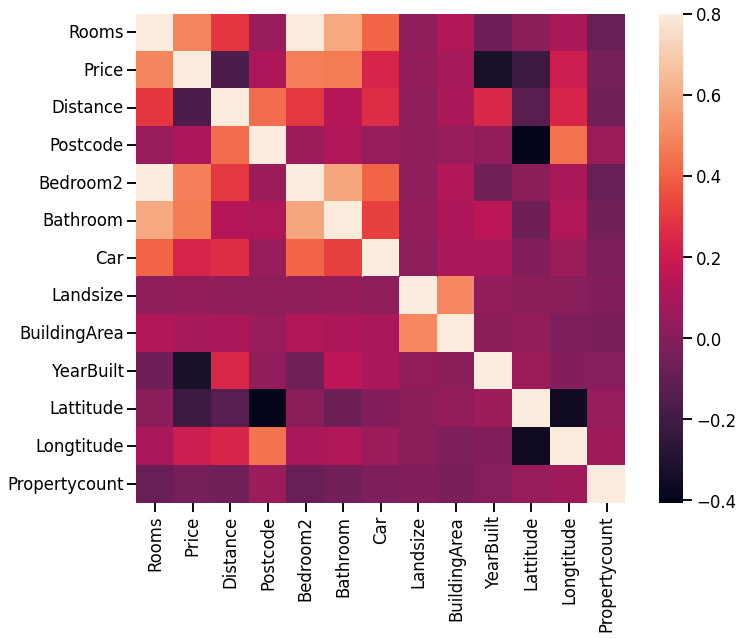

In [ ]:
f,ax=plt.subplots (figsize=(12,9))
sns.heatmap (corrmat,vmax=.8,square=True)

<font color='Green'><strong>
PASO 10: Para validar cuales son las columnas mas relevantes utilizamos el valor de la correlacion de las variable con el precio sin considerar el signo. Se ordenan en forma descendente. Se establece la linea de corte en 0.40.


In [ ]:
corr=corrmat.Price.abs()
correlacion=corr.sort_values(ascending=False)
correlacion

Price            1.000000
Rooms            0.496634
Bedroom2         0.475951
Bathroom         0.467038
YearBuilt        0.323617
Car              0.238979
Lattitude        0.212934
Longtitude       0.203656
Distance         0.162522
Postcode         0.107867
BuildingArea     0.090981
Propertycount    0.042153
Landsize         0.037507
Name: Price, dtype: float64

<font color='Green'><strong>
PASO 11: En base a los análisis anteriores, se consideran como columnas relevantes para el análisis de precio: Rooms, Bathroom, Bedroom2. Estas variables presentaron, con respecto el precio, correlaciones superiores al 0.4 mientras el resto de las variables las correlaciones fueron menores. Dado que Rooms y BedRoom2 presentan una alta correlacion entre ellas (0.94, ver PASO 11) se decide investigar cual de las dos es la mejor para dejarla en el análisis y descartar la otra ya que dada su alta correlación mantener las dos variables no agregaría información adicional al análisis.Se decide conservar la variable ROOMS ya que es practicamente la misma que Bedrooms2 solo con un outlier (20) que modifica la media, maximo, etc. 
NOTA: En este punto se probó y se descarto hacer un dropna (eliminación de valores NA en general) porque se perdia gran cantidad de registros(filas). ASi que se decidio hacer un analisis estadistico de cada una de las variables relevantes según el análisis de correlación y tomar decisiones sobre cada una de ellas.

In [ ]:
melb_df. Bedroom2.describe()

count    13580.000000
mean         2.914728
std          0.965921
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         20.000000
Name: Bedroom2, dtype: float64

In [ ]:
melb_df. Rooms.describe()

count    13580.000000
mean         2.937997
std          0.955748
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
Name: Rooms, dtype: float64

<font color='Green'><strong>
PASO 12: Se realiza estadistica descriptiva de la variable PRECIO  y una visualizacion de los registros a través de un histograma para detectar la distribución y outliers. 

In [ ]:
melb_df.Price.describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

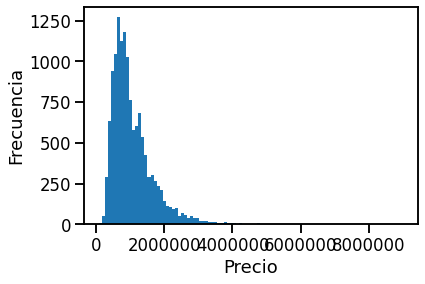

In [ ]:
plt.hist(melb_df['Price'], bins = 100)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()


<font color='Green'><strong>
PASO 13: Dado que la distribución de la variable precio esta claramente sesgada a la izquierda y presenta valores extremos en la cola derecha, decidimos hacer un recorte de los registros a contemplar en el análisis, considerando sólo a aquellos registros que se encuentren entre los cuartiles 10 y 90 de precio. Realizamos un nuevo histrograma para visualizar la distribución de los registros una vez efectuado este recorte.El histograma nos muestra claramente una distribución de los datos menos sesgada.

In [ ]:
melb_df.shape

(13580, 21)

In [ ]:
Q1 = melb_df["Price"].quantile(.10)
Q3 = melb_df["Price"].quantile(.90)
IQR = Q3 - Q1
melb_df_sin= melb_df[~((melb_df['Price']<(Q1))|(melb_df['Price']>(Q3)))]
print('Q1: {} ::: Q3: {}'.format(int(Q1),int(Q3)))
print("Tamaño df quitando outliers: ", melb_df_sin.shape)

Q1: 480000 ::: Q3: 1850000
Tamaño df quitando outliers:  (10913, 21)


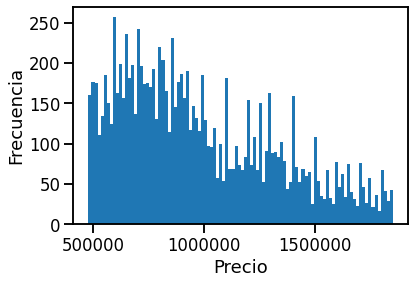

In [ ]:
plt.hist(melb_df_sin['Price'], bins = 100)
plt.ticklabel_format(style='plain', axis='x')
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

<font color='Green'><strong>
PASO 14:  Se realiza estadistica descriptiva de la variable ROOMs  y una visualizacion de los registros a través de un boxplot. Se puede observar que la mayor cantidad de registros de propiedades cuentan entre 2 a 4 habitaciones ( promedio 2.96).

In [ ]:
melb_df_sin.Rooms.describe()

count    10913.000000
mean         2.963530
std          0.835404
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         10.000000
Name: Rooms, dtype: float64

Text(0, 0.5, 'Frecuencia')

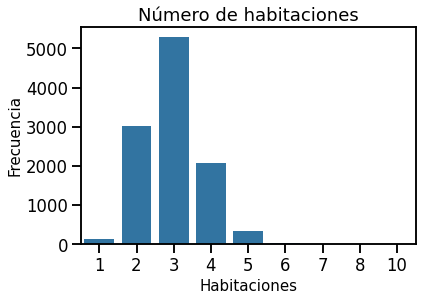

In [ ]:
# sns.barplot(x=melb_df_sin['Rooms']).set(title='Boxplot de "Número de habitaciones"')
sns.countplot(x=melb_df_sin.Rooms,color='#1f77b4').set(title='Número de habitaciones')
plt.xlabel('Habitaciones',fontsize=15)
plt.ylabel('Frecuencia',fontsize=15)

<font color='Green'><strong>
PASO 15: Se realiza estadistica descriptiva de la variable Bathroom y una visualizacion de los registros a través de un boxplot. En este caso se observa un gran número de registros de propiedades sin baño. Se realiza un analisis de las frecuencias por número de baños y se detecta que hay 28 casos de propiedades que han señalado no tener baño. Se toma la decision de quitar estos registros ya que estamos analizando el precio de viviendas que entendemos cuentan necesariamente con baño. 

In [ ]:
melb_df_sin.Bathroom.describe()

count    10913.000000
mean         1.500871
std          0.629510
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: Bathroom, dtype: float64

In [ ]:
melb_df_sin.Bathroom=melb_df_sin.Bathroom.astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0, 0.5, 'Frecuencia')

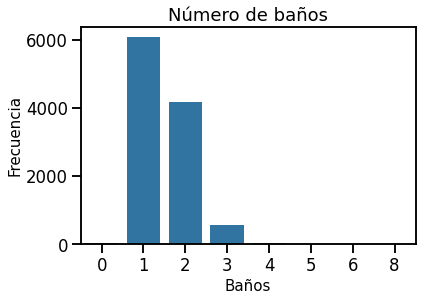

In [ ]:
#sns.boxplot(x=melb_df_sin['Bathroom']).set(title='Boxplot de "Número de Baños"')
plt.xlabel('Baños',fontsize=15)
sns.countplot(x=melb_df_sin.Bathroom,color='#1f77b4').set(title='Número de baños')
plt.xlabel('Baños',fontsize=15)
plt.ylabel('Frecuencia',fontsize=15)

In [ ]:
melb_df_sin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10913 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         10913 non-null  object 
 1   Address        10913 non-null  object 
 2   Rooms          10913 non-null  int64  
 3   Type           10913 non-null  object 
 4   Price          10913 non-null  float64
 5   Method         10913 non-null  object 
 6   SellerG        10913 non-null  object 
 7   Date           10913 non-null  object 
 8   Distance       10913 non-null  float64
 9   Postcode       10913 non-null  float64
 10  Bedroom2       10913 non-null  float64
 11  Bathroom       10913 non-null  int64  
 12  Car            10857 non-null  float64
 13  Landsize       10913 non-null  float64
 14  BuildingArea   5629 non-null   float64
 15  YearBuilt      6447 non-null   float64
 16  CouncilArea    9755 non-null   object 
 17  Lattitude      10913 non-null  float64
 18  Longti

In [ ]:
Baños = melb_df_sin.Bathroom.value_counts()\
    .reset_index()\
     .rename(columns={'index': 'nº baños', 'Bathroom':'Frecuencia'})
          
Baños.head(20)

,nº baños,Frecuencia
0,1,6075
1,2,4187
2,3,579
3,4,32
4,0,28
5,5,9
6,6,2
7,8,1


In [ ]:
Baños.shape

(8, 2)

<font color='Green'><strong>
PASO 16: Se eliminan los registros sin baño (baño=0) y nos queda un dataframe final denominado "melb_df_final" con las modificaciones a las variables ya efectuadas. Se arma un nuevo dataframe que solo contiene el recorte de las variables "relevantes" que se justificaron en pasos anteriores (Pasos 11 a 13)  denominado melb_df_relevant del cual se calcula estadistica descriptiva y se da por finalizado el Ejercicio 2.1

In [ ]:
melb_df_final= melb_df_sin[(melb_df_sin['Bathroom'] > 0)] 
melb_df_sin

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13574,Westmeadows,9 Black St,3,h,582000.0,S,Red,26/08/2017,16.5,3049.0,...,2,2.0,256.0,NaN,NaN,NaN,-37.67917,144.89390,Northern Metropolitan,2474.0
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0


#### Análisis de variables categóricas y su relación con el precio

<font color='Green'><strong>
PASO 17: Se seleccionan, de las variables categóricas, "Type" y "Regionname", según las cuales existe variabilidad en el precio de las propiedades.

In [ ]:
melb_df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

Text(0, 0.5, 'Tipo')

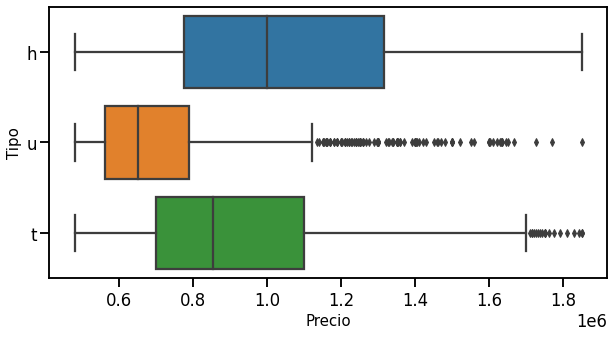

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=melb_df_sin.Type,x=melb_df.Price)
plt.xlabel('Precio',fontsize=15)
plt.ylabel('Tipo',fontsize=15)

Text(0, 0.5, 'Region')

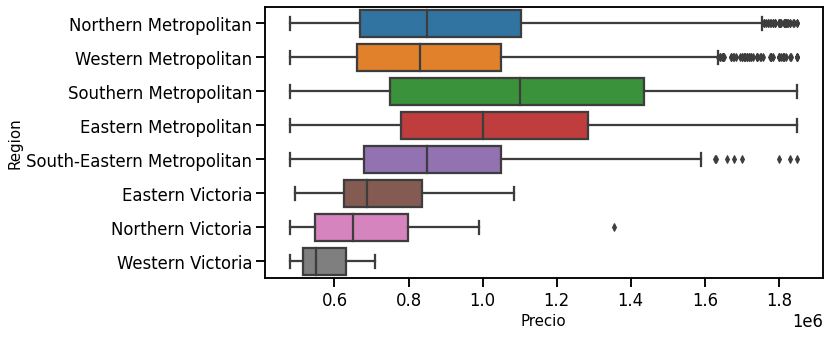

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(y=melb_df_sin.Regionname,x=melb_df.Price)
plt.xlabel('Precio',fontsize=15)
plt.ylabel('Region',fontsize=15)

<font color='Green'><strong>
PASO 18: Se incluyen también las columnas YearBuilt y BuildingArea porque son necesarias para cumplir con algunos puntos solicitados en la parte 2 del entregable.

In [ ]:
relevant_cols = ['Price', 'Rooms', 'Bathroom', 'Postcode','Type','Regionname','YearBuilt','BuildingArea']

In [ ]:
melb_df_relevant = melb_df_final[relevant_cols]

In [ ]:
melb_df_relevant.describe()

,Price,Rooms,Bathroom,Postcode,YearBuilt,BuildingArea
count,1.088500e+04,10885.000000,10885.000000,10885.000000,6445.000000,5629.000000
mean,9.825376e+05,2.964722,1.504731,3102.193477,1965.116835,149.570052
std,3.509653e+05,0.835322,0.625694,91.675316,36.975030,604.550537
min,4.800000e+05,1.000000,1.000000,3000.000000,1196.000000,0.000000
25%,6.950000e+05,2.000000,1.000000,3043.000000,1945.000000,98.000000
50%,9.020000e+05,3.000000,1.000000,3081.000000,1970.000000,126.000000
75%,1.240000e+06,3.000000,2.000000,3147.000000,1999.000000,165.000000
max,1.850000e+06,10.000000,8.000000,3977.000000,2018.000000,44515.000000


In [ ]:
melb_df_relevant.sample(5)

,Price,Rooms,Bathroom,Postcode,Type,Regionname,YearBuilt,BuildingArea
7397,780000.0,4,2,3041.0,h,Western Metropolitan,NaN,NaN
3023,1686500.0,4,2,3188.0,h,Southern Metropolitan,NaN,NaN
2973,810000.0,3,2,3046.0,h,Northern Metropolitan,1950.0,129.0
3361,890000.0,3,2,3079.0,t,Eastern Metropolitan,2005.0,140.0
6450,711000.0,3,1,3087.0,h,Northern Metropolitan,NaN,NaN


### 2. Agregar información adicional respectiva al entorno de una propiedad a partir del [conjunto de datos de AirBnB](https://www.kaggle.com/tylerx/melbourne-airbnb-open-data?select=cleansed_listings_dec18.csv) utilizado en el práctico. 
  1. Seleccionar qué variables agregar y qué combinaciones aplicar a cada una. Por ejemplo, pueden utilizar solo la columna `price`, o aplicar múltiples transformaciones como la mediana o el mínimo.
  1. Utilizar la variable zipcode para unir los conjuntos de datos. Sólo incluir los zipcodes que tengan una cantidad mínima de registros (a elección) como para que la información agregada sea relevante.
  2. Investigar al menos otras 2 variables que puedan servir para combinar los datos, y justificar si serían adecuadas o no. Pueden asumir que cuentan con la ayuda de anotadores expertos para encontrar equivalencias entre barrios o direcciones, o que cuentan con algoritmos para encontrar las n ubicaciones más cercanas a una propiedad a partir de sus coordenadas geográficas. **NO** es necesario que realicen la implementación.

Pueden leer otras columnas del conjunto de AirBnB además de las que están en `interesting_cols`, si les parecen relevantes.

<font color='Green'><strong>
PASO 19: En funcion de lo solicitado por el Ejercicio 2.2 se seleccionan un conjunto de variables del dataset (AirBnB) para agregar a la información provista por el dataset Melbourne. Se leen los datos y se arma el dataframe con las variables consideradas "interesantes" para el análisis (Ejercicio 2.2.1)

In [ ]:
interesting_cols = [
  'description', 'neighborhood', 'city', 'state', 'zipcode',
  'price', 'weekly_price', 'monthly_price', 
  'latitude', 'longitude',
]
airbnb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/cleansed_listings_dec18.csv',
    usecols=interesting_cols)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
airbnb_df[:3]

,description,neighborhood,city,state,zipcode,latitude,longitude,price,weekly_price,monthly_price
0,"House: Clean, New, Modern, Quite, Safe. 10Km f...",Balwyn North,Manningham,VIC,3105,-37.772684,145.092133,60,NaN,NaN
1,A large air conditioned room with queen spring...,Brunswick,Moreland,VIC,3057,-37.766505,144.980736,35,200.0,803.0
2,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,St Kilda,Port Phillip,VIC,3182,-37.859755,144.977369,159,1253.0,4452.0


<font color='Green'><strong>
PASO 20: Se solicita un conteo de registros por codigo postal (zipcode). Sin embargo, este zipcode tiene tipos diferentes, por lo que se procede  a estandarizar antes de continuar con la combinación de los datos.

In [ ]:
airbnb_df.zipcode.value_counts()[:5]

3000.0    2491
3000       876
3006.0     860
3182.0     579
3182       556
Name: zipcode, dtype: int64

In [ ]:
airbnb_df['zipcode'] = pd.to_numeric(airbnb_df.zipcode, errors='coerce')

In [ ]:
airbnb_df.zipcode.value_counts().head(5)

3000.0    3367
3006.0    1268
3182.0    1135
3141.0     881
3004.0     728
Name: zipcode, dtype: int64

<font color='Green'><strong>
PASO 21:Ya estandarizada la variable "zipcode" se procede a observar la cantidad de registros únicos en los datasets Airbnb y Merlbourne para zipcode y postcode respectivamente. Se observa que una vez unidos los datasets, nos quedaría una base con 1616707 registros.

In [ ]:
intersection = np.intersect1d(
    airbnb_df.zipcode.values, melb_df_relevant.Postcode.values, assume_unique=False)
print("Códigos únicos Airbnb", len(airbnb_df.zipcode.unique()))
print("Códigos únicos Melbourne", len(melb_df.Postcode.unique()))
print("Codigos en común", len(intersection))

Códigos únicos Airbnb 248
Códigos únicos Melbourne 198
Codigos en común 190


In [ ]:
len(melb_df_relevant.merge(airbnb_df, how='inner',
                  left_on='Postcode', right_on='zipcode'))

1616707

<font color='Green'><strong>
PASO 22: Se agrupan los registros por "zipcode" y se observa la cantidad de registros por cada uno de modo poder realizar lo solicitado en el Ejercicio 2.2 y seleccionar solo aquellos con un mínimo de registros a determinar.<br>

In [ ]:
relevant_cols = ['price',  'zipcode']
airbnb_price_by_zipcode = airbnb_df[relevant_cols].groupby('zipcode')\
  .agg({'price': ['mean', 'count']})\
  .reset_index()
airbnb_price_by_zipcode.columns = [
  ' '.join(col).strip()
  for col in airbnb_price_by_zipcode.columns.values]
# Rename columns
airbnb_price_by_zipcode = airbnb_price_by_zipcode.rename(
    columns={'price mean': 'media_precio_Airbnb',
             'price count': 'conteo'})

In [ ]:
airbnb_price_by_zipcode

,zipcode,media_precio_Airbnb,conteo
0,2010.0,40.000000,1
1,2134.0,50.000000,1
2,2582.0,104.000000,1
3,3000.0,150.504307,3367
4,3001.0,132.500000,2
...,...,...,...
242,7367.0,230.000000,1
243,8938.0,296.000000,1
244,9004.0,226.000000,1
245,9540.0,245.000000,1


In [ ]:
merged_sales_df = melb_df_relevant.merge(
   airbnb_price_by_zipcode, how='left',
    left_on='Postcode', right_on='zipcode')
merged_sales_df

,Price,Rooms,Bathroom,Postcode,Type,Regionname,YearBuilt,BuildingArea,zipcode,media_precio_Airbnb,conteo
0,1480000.0,2,1,3067.0,h,Northern Metropolitan,NaN,NaN,3067.0,130.624031,258.0
1,1035000.0,2,1,3067.0,h,Northern Metropolitan,1900.0,79.0,3067.0,130.624031,258.0
2,1465000.0,3,2,3067.0,h,Northern Metropolitan,1900.0,150.0,3067.0,130.624031,258.0
3,850000.0,3,2,3067.0,h,Northern Metropolitan,NaN,NaN,3067.0,130.624031,258.0
4,1600000.0,4,1,3067.0,h,Northern Metropolitan,2014.0,142.0,3067.0,130.624031,258.0
...,...,...,...,...,...,...,...,...,...,...,...
10880,582000.0,3,2,3049.0,h,Northern Metropolitan,NaN,NaN,3049.0,92.285714,21.0
10881,1245000.0,4,2,3150.0,h,South-Eastern Metropolitan,1981.0,NaN,3150.0,124.026455,189.0
10882,1031000.0,3,2,3016.0,h,Western Metropolitan,1995.0,133.0,3016.0,191.094595,74.0
10883,1170000.0,3,2,3016.0,h,Western Metropolitan,1997.0,NaN,3016.0,191.094595,74.0


<font color='Green'><strong>
PASO 23: Se agrupan los registros por "zipcode" y se observa la cantidad de registros por cada zipcode de modo de poder realizar lo solicitado en el Ejercicio 2.2 y seleccionar solo aquellos con un mínimo de registros. Se toma la determinación de descartar los zipcodes con una frecuencia menor al 1% del total de los datos. 

In [ ]:
zipcodes_aceptados=len(merged_sales_df['conteo'])*0.01
zipcodes_aceptados

108.85000000000001

In [ ]:
df_final= merged_sales_df[merged_sales_df['conteo']>zipcodes_aceptados]
df_final

,Price,Rooms,Bathroom,Postcode,Type,Regionname,YearBuilt,BuildingArea,zipcode,media_precio_Airbnb,conteo
0,1480000.0,2,1,3067.0,h,Northern Metropolitan,NaN,NaN,3067.0,130.624031,258.0
1,1035000.0,2,1,3067.0,h,Northern Metropolitan,1900.0,79.0,3067.0,130.624031,258.0
2,1465000.0,3,2,3067.0,h,Northern Metropolitan,1900.0,150.0,3067.0,130.624031,258.0
3,850000.0,3,2,3067.0,h,Northern Metropolitan,NaN,NaN,3067.0,130.624031,258.0
4,1600000.0,4,1,3067.0,h,Northern Metropolitan,2014.0,142.0,3067.0,130.624031,258.0
...,...,...,...,...,...,...,...,...,...,...,...
10850,1502000.0,4,3,3011.0,h,Western Metropolitan,2014.0,199.0,3011.0,95.601010,198.0
10868,1450000.0,3,1,3071.0,h,Northern Metropolitan,NaN,NaN,3071.0,125.008772,114.0
10869,1271000.0,3,1,3071.0,h,Northern Metropolitan,1950.0,151.0,3071.0,125.008772,114.0
10879,635000.0,4,2,3030.0,h,Western Metropolitan,1980.0,172.0,3030.0,115.748062,258.0


In [ ]:
df_final.drop(['zipcode','conteo'],inplace=True,axis=1)
df_final=df_final.rename(columns={'Price': 'precio', 'Rooms': 'habitaciones', 'Bathroom': 'baños', 'Postcode': 'cp_melb','Type': 'tipo','Regionname': 'region','YearBuilt': 'año_construccion','BuildingArea': 'sup_construida'})

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_final.sample(10)

,precio,habitaciones,baños,cp_melb,tipo,region,año_construccion,sup_construida,media_precio_Airbnb
8402,937000.0,3,2,3057.0,t,Northern Metropolitan,2000.0,121.8,154.432432
7738,520000.0,2,1,3056.0,u,Northern Metropolitan,NaN,NaN,94.672646
3827,965000.0,3,1,3072.0,h,Northern Metropolitan,NaN,NaN,94.156028
3686,1101000.0,2,1,3207.0,h,Southern Metropolitan,1910.0,71.0,200.210117
3016,488000.0,2,2,3032.0,u,Western Metropolitan,NaN,NaN,111.613636
2089,556000.0,2,2,3031.0,u,Northern Metropolitan,2009.0,79.0,119.914894
2732,1050000.0,3,1,3031.0,h,Northern Metropolitan,1900.0,NaN,119.914894
3942,1142500.0,4,1,3072.0,h,Northern Metropolitan,1970.0,160.0,94.156028
4212,750000.0,2,2,3121.0,u,Northern Metropolitan,2000.0,104.0,162.262739
4328,1455000.0,4,2,3011.0,h,Western Metropolitan,1920.0,198.0,95.601010


<font color='Green'><strong>
PASO 24: Como lo solicita el Ejercicio 2.3, investigamos 2 variables que puedan servir para combinar los datos, y justificamos la decisión. Consideramos que podría ser apropiado trabajar sobre las variables latitud y longitud que estan presentes en ambos data sets. Se nos ocurre transformar esas variables de modo de asignar las latitutes y longitudes a rangos predeterminados que sean iguales en ambos data sets. De ese modo, usaríamos Join/Merge entre la variable "rango_latitud_airbnb" y "rango_latitud_melbourne" y lo mismo podría ser con longitud. Si el registro coincide en el rango de latitud en ambos datasets, ese registro se une en las variables que sean seleccionadas. 

## Ejercicio 3:

Crear y guardar un nuevo conjunto de datos con todas las transformaciones realizadas anteriormente.

<font color='Green'><strong>
PASO 25: Se guarda el dataframe final como archivo separdo por comas y luego se lo lanza para descarga.

In [ ]:
df_final.to_csv("join_airbnb_melb_byzipcode.csv", index=None)

In [ ]:
from google.colab import files
files.download('join_airbnb_melb_byzipcode.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>